# Hand Gesture
### With Convolutional Neural Networks

● Index

● OK

● Swap right

● Swap left




## Set up

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
import numpy as np
import itertools
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'Data/train'
test_path = 'Data/test'

TARGET_SIZE = (300, 300)
BATCH_SIZE = 64
CLASSES = ['index', 'OK', 'swap_right', 'swap_left']

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Functions

###### prints and plots confusion matrix


In [3]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes) + 1)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.tight_layout()
    plt.yticks(tick_marks, classes)
    plt.tight_layout()

    print(cm)
    thresh = cm.max() // 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

###### plots images with labels

In [4]:
def plot_data(train):
    for X, y in train:

        plt.figure(figsize=(16, 16))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.axis('off')
            plt.title('Label: %d' % np.argmax(y[i]))
            img = np.uint8(255 * X[i, :, :, 0])
            plt.imshow(img, cmap='gray')
        break


## Preprocess

● Train set - 5600 images belonging to 4 classe, 1400 sample for each class.

● Validation set - 2400 images belonging to 4 classe, 600 sample for each class .



###### Data augmentation

In [5]:
data_augmentation = ImageDataGenerator(rescale=1./255,
                                       rotation_range=3,
                                       width_shift_range=0.2,
                                       brightness_range=[0.2, 1.5],
                                       shear_range=0.01,
                                       zoom_range=0.1,
                                       fill_mode='nearest',
                                       validation_split=0.3)

###### generates batches of normalized data - flow_from_directory()

In [6]:
train = data_augmentation.flow_from_directory(train_path,
                                                target_size=TARGET_SIZE,
                                                color_mode='grayscale',
                                                batch_size=BATCH_SIZE,
                                                classes=CLASSES,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset='training')

Found 5600 images belonging to 4 classes.


In [7]:
print("Validation set: ", end=' ')
validation = data_augmentation.flow_from_directory(train_path,
                                                   target_size=TARGET_SIZE,
                                                   color_mode='grayscale',
                                                   batch_size=BATCH_SIZE,
                                                   classes=CLASSES,
                                                   class_mode='categorical',
                                                   shuffle=True,
                                                   subset='validation')

Validation set:  Found 2400 images belonging to 4 classes.


 ###### Make sure our data are labeled correctly 
 0. Index
 1. OK
 2. Swap right
 3. Swap left


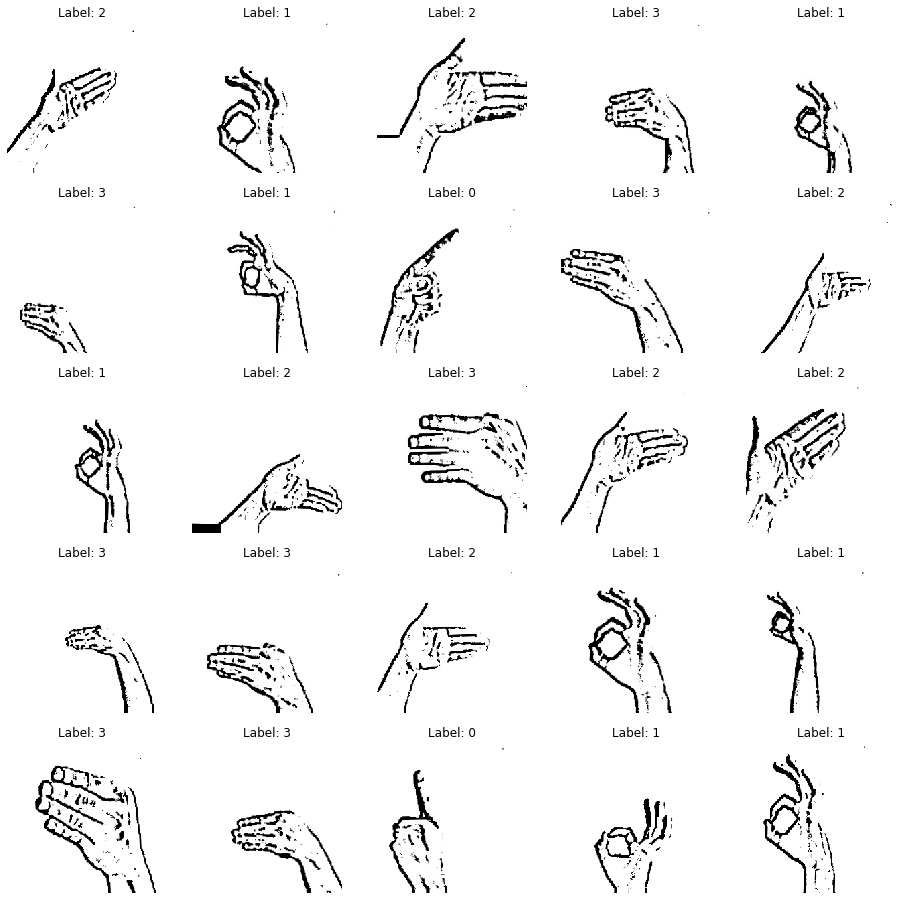

In [8]:
plot_data(train)

## Convolutional Neural Network Architecture

First model with bad results, overfitting.

In [10]:
model_1 = Sequential() 
model_1.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,1)))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(64, (3,3), activation='relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(128, (3,3), activation='relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Conv2D(128, (3,3), activation='relu'))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Flatten())

model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(4, activation='softmax'))

model_1.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
______________________

The second model is better than the first model but still overfitting.

In [11]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 1)))
model_2.add(MaxPooling2D((2,2)))

model_2.add(Conv2D(64, (3,3), activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling2D((2,2)))

model_2.add(Conv2D(128, (3,3), activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling2D((2,2)))

model_2.add(Flatten())

model_2.add(Dense(150, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(4, activation='softmax'))

model_2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 71, 71, 128)       0         
__________

The third model with:

● More data augmentation and more Dropout.

● Less layers and neurons


In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 71, 71, 64)        0         
__________

###### configures the model for training

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [14]:
callback_list = [
                EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto'),
                ModelCheckpoint(filepath='Weights/handGestureModel_notebook.h5', monitor='val_loss', save_best_only=True),
                ]

## Training

In [15]:
history = model.fit_generator(train,
                    steps_per_epoch=train.samples // BATCH_SIZE,
                    epochs=70,
                    validation_data=validation,
                    validation_steps=validation.samples // BATCH_SIZE,
                    callbacks=callback_list,
                    verbose=2
                    )


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/70
 - 429s - loss: 1.0936 - acc: 0.5302 - val_loss: 0.8547 - val_acc: 0.7660
Epoch 2/70
 - 433s - loss: 0.5777 - acc: 0.7629 - val_loss: 0.5380 - val_acc: 0.8339
Epoch 3/70
 - 430s - loss: 0.4270 - acc: 0.8276 - val_loss: 0.4883 - val_acc: 0.8609
Epoch 4/70
 - 424s - loss: 0.3403 - acc: 0.8570 - val_loss: 0.4043 - val_acc: 0.8848
Epoch 5/70
 - 430s - loss: 0.2973 - acc: 0.8807 - val_loss: 0.3736 - val_acc: 0.8750
Epoch 6/70
 - 434s - loss: 0.2655 - acc: 0.8906 - val_loss: 0.3723 - val_acc: 0.8724
Epoch 7/70
 - 445s - loss: 0.2330 - acc: 0.9037 - val_loss: 0.2946 - val_acc: 0.8934
Epoch 8/70
 - 443s - loss: 0.2127 - acc: 0.9050 - val_loss: 0.3236 - val_acc: 0.8763
Epoch 9/70
 - 436s - loss: 0.2141 - acc: 0.9106 - val_loss: 0.2905 - val_acc: 0.9015
Epoch 10/70
 - 442s - loss: 0.1915 - acc: 0.9124 - val_loss: 0.2776 - val_acc: 0.9037
Epoch 11/70
 - 430s - loss: 0.2003 - acc: 0.9170 - val_

## Performance and Analysis

Text(0.5, 0, '# of epochs')

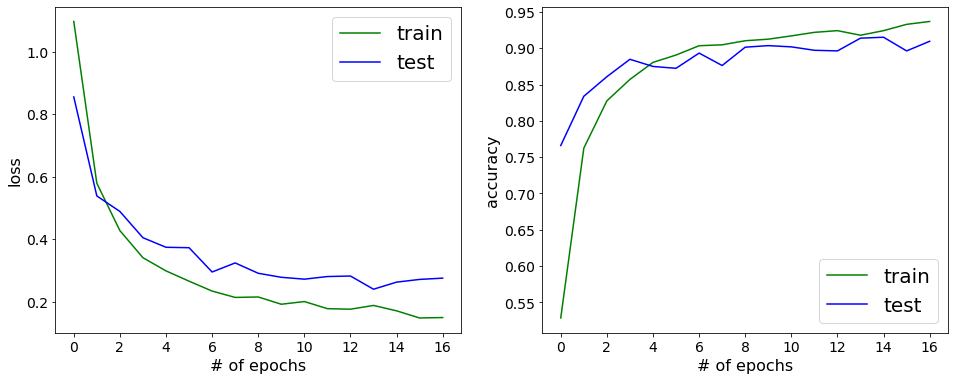

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['acc'],     'g-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

###### Data augmentation and flow from directory for test set

In [17]:
test_data_augmentation = ImageDataGenerator(rescale=1./255)
test = test_data_augmentation.flow_from_directory(
        test_path,
        target_size=TARGET_SIZE,
        color_mode='grayscale',
        batch_size=BATCH_SIZE,
        classes=CLASSES,
        class_mode='categorical',
        shuffle=False
    )


Found 24 images belonging to 4 classes.


###### Testing accuracy

In [18]:
# testing accuracy
X_test, y_test = [], []
for i, (X, y) in enumerate(test):
    X_test.append(X)
    y_test.append(y)
    i += 1
    if (i == 6): break
    
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])
y_pred = np.int32([np.argmax(r) for r in model.predict(X_test)])
match = (y_test == y_pred)
print('Testing Accuracy = %.2f%%' % (np.sum(match)*100/match.shape[0]))

Testing Accuracy = 95.83%


###### Confusion matrix

[[30  6  0  0]
 [ 0 36  0  0]
 [ 0  0 36  0]
 [ 0  0  0 36]]


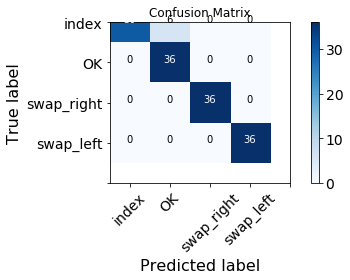

In [19]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, CLASSES, title='Confusion Matrix')